In [1]:
#importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import scipy.optimize as spop
import matplotlib.pyplot as plt
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import grangercausalitytests
#import statsmodels.tsa.stattools as ts

In [2]:
#specifying parameters
stocks = ['JPM','C'] #['XOM', 'CVX'] #['TSM','NVDA'] #['TSLA','NVDA'] #['INTC','NVDA'] #['AMD','NVDA'] #['TSM','NVDA'] #['QCOM','NVDA'] #['QQQ','VOO']
start = '2019-12-31' #'2019-09-28'
end = '2021-03-08'  #'2021-09-28'
fee = 0.001
window = 252 # trading days in year
DF_threshold = -2.5 # DF-critical: 10% = -1.161, 5% = -1.941, 1% = -2.567
# trade when < test statistics: [good.. -3 -4 -5 ..wonderful]; out of confidence bandwidth?; t-dist for 2 data point to compare at a timestamp moment?
#retrieving data
data = pd.DataFrame()
returns = pd.DataFrame()
for stock in stocks:
    prices = yf.download(stock, start, end)
    data[stock] = prices['Close']
    returns[stock] = np.append(data[stock][1:].reset_index(drop=True)/data[stock][:-1].reset_index(drop=True) - 1 , 0)  #change%, 0 at last∵don't know $ of next day yet

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data

,JPM,C
Date,,
2019-12-31,139.399994,79.889999
2020-01-02,141.089996,81.230003
2020-01-03,138.339996,79.699997
2020-01-06,138.229996,79.449997
2020-01-07,135.880005,78.760002
...,...,...
2021-03-01,150.500000,69.540001
2021-03-02,150.009995,68.910004
2021-03-03,152.910004,70.379997


In [4]:
#initialising arrays
#def __init__(self):
gross_returns = np.array([])
net_returns = np.array([])
t_s = np.array([])
stock1 = stocks[0]
stock2 = stocks[1]

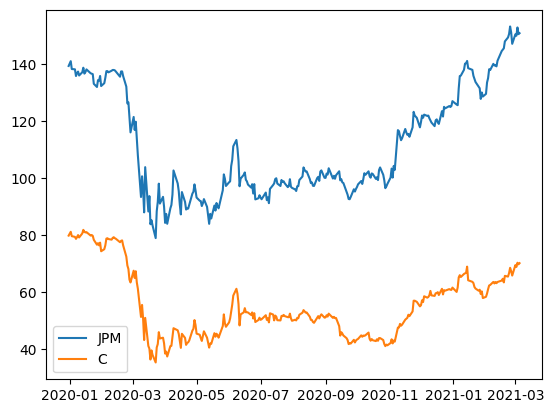

In [5]:
plt.plot(data,label=data.columns)
plt.legend()

#Augmented Dickey-Fuller Table (DF critical values)
![image info](https://real-statistics.com/wp-content/uploads/2019/01/adf-table-critical-values.png)

Simple $AR(1)$ model:

$y_t = μ+ 𝜙y_{t-1} + 𝜀_t$

where $𝜀_t$ ~ $N(0,𝜎^2)$

> $H_0$ : 𝜙 = 1 ( has unit root -> non-stationary, a random walk ($y_t = ∑𝜀_t$ if $y_0=0$ and without dirfting $μ$), 𝜎 influenced by former moment ( i.e. 𝜎 depends on time t))

> $H_1$ : 𝜙 < 1 ( no unit root -> stationary, influence from former 𝜎 will decrease gradully, Cov and 𝜎 can be a constant (i.e. independent on time t))

Transform dynamic to station by unit difference (self against lag_1) as delta:

$y_t - y_{t-1} = μ+ (𝜙-1)y_{t-1} + 𝜀_t$

$𝛥y_t = μ+  𝛿y_{t-1} + 𝜀_t$

$𝛥y_t = 𝛿y_{t-1} + 𝜀_t$ (ignore static mean (no constant drift, no trend, stable over time),  we want the gap (stock price - fair value) fluctuate around zero)

Let 𝜙 - 1 = 𝛿

> $H_0$ : 𝛿 = 0 (where $y_t$ is non-statioinary)

> $H_1$ : 𝛿 < 0 (where $y_t$ is statioinary)

test-statistics:

$t_\hat{𝛅} = \frac{\hat{𝛅}}{se(\hat{𝛅})}$

$t_\hat{𝛅}$  < DF critical value , reject $H_0$ , 𝛿 significantly different from 0 ($y_t$ is stationary, profitable when two prices converge, the gap of conintegration (stock price - fair value) at lagged unit gen signal to long/short stocks pair base on undervalued/overvalued stocks by fair value)

$t_\hat{𝛅}$  > DF critical value , no evidence to reject $H_0$ ($y_t$ can be non-stationry)

For

## For Cointegration test

To test if there is stationary in price spread of the pair stocks that their tendency are similar

> $y_t$ is price of stock2 at time t

> $x_t$ is price of stock1 at time t



> Fair value:

$\hat{y_t} = a + b*x_t$

> $z_t$  is the difference between dyanmic equlibrium(fair value) and price of stock2 (the response variable), (i.e. the value of undervalued/overvalued at time t)

$z_t = \hat{y_t} - y_t$

>

> To apply Dickey-Fuller test in this example,

> $H_0$ : 𝛿 = 0 (where $z_t = (a+b∗x_t) - y_t$ is non-statioinary)

> $H_1$ : 𝛿 < 0 (where $z_t = (a+b∗x_t) - y_t$ is statioinary)

$𝛥z_t = 𝛿z_{t-1} + 𝜀_t$

> $z_{t-1}$ is lagged a trading day unit

> $𝛥z_t$ is the change of $(z_t-z_{t-1})$

> we then find the optimal coefficient 𝛿 and $t_\hat{𝛅}$ given $𝛥z_t$ and $z_{t-1}$, to determine whether the signal is confident to trigger

Looking for the mean reversion of the price spread from divergen to convergen



day 2020-12-30 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2020-12-31 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-04 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-05 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-06 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-07 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-08 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-11 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-12 00:00:00

long position on JPM and short 

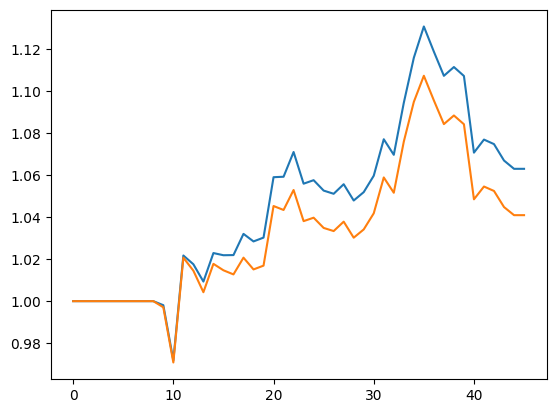

In [6]:
#moving through the sample
for t in range(window, len(data)):
    #defining the unit root function: stock2 = a + b*stock1
    def unit_root(b):
        a = np.average(data[stock2][t-window:t] - b*data[stock1][t-window:t])
        fair_value = a + b*data[stock1][t-window:t]  # equilibrium
        diff = np.array(fair_value - data[stock2][t-window:t])
        diff_diff = diff[1:] - diff[:-1]
        reg = sm.OLS(diff_diff, diff[:-1])
        res = reg.fit()
        return res.params[0]/res.bse[0]
    #optimising the cointegration equation parameters
    res1 = spop.minimize(unit_root, data[stock2][t]/data[stock1][t], method='Nelder-Mead') # b = C/JPM <1
    t_opt = res1.fun #
    b_opt = float(res1.x)
    a_opt = np.average(data[stock2][t-window:t] - b_opt*data[stock1][t-window:t])
    #simulating trading
    fair_value = a_opt + b_opt*data[stock1][t] # Dynamic equilibrium
    if t == window:
        old_signal = 0
    if t_opt > DF_threshold:
        signal = 0
        gross_return = 0
    else:
        signal = np.sign(fair_value - data[stock2][t])
        gross_return = signal*returns[stock2][t] - signal*returns[stock1][t]
    fees = fee*abs(signal - old_signal)
    net_return = gross_return - fees
    gross_returns = np.append(gross_returns, gross_return)
    net_returns = np.append(net_returns, net_return)
    t_s = np.append(t_s, t_opt)
    #interface: reporting daily positions and realised returns
    print('day '+str(data.index[t]))
    print('')
    if signal == 0:
        print('no trading')
    elif  signal == 1:
        print('long position on '+stock2+' and short position on '+stock1)
    else:
        print('long position on '+stock1+' and short position on '+stock2)
    print('gross daily return: '+str(round(gross_return*100,2))+'%')
    print('net daily return: '+str(round(net_return*100,2))+'%')
    print('cumulative net return so far: '+str(round(np.prod(1+net_returns)*100-100,2))+'%')
    print('')
    old_signal = signal
#plotting equity curves
plt.plot(np.append(1,np.cumprod(1+gross_returns)))
plt.plot(np.append(1,np.cumprod(1+net_returns)))


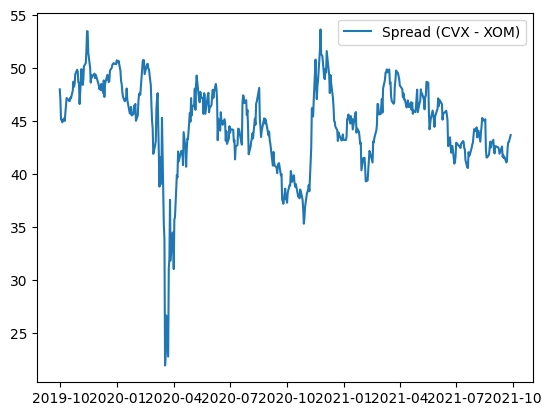

In [ ]:
plt.plot(data['CVX']-data['XOM'], label = 'Spread (CVX - XOM)')
plt.legend()

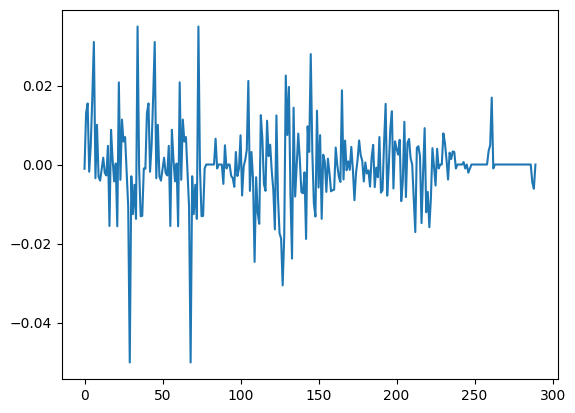

In [ ]:
plt.plot(net_returns)